In [4]:
# %load /Users/hwayment/ipynb_defaults.py
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

from glob import glob
import os, sys, pickle, requests

from design import Design
from conformation import Conformation
from plot import *
import networkx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


## demonstrate Conformation class

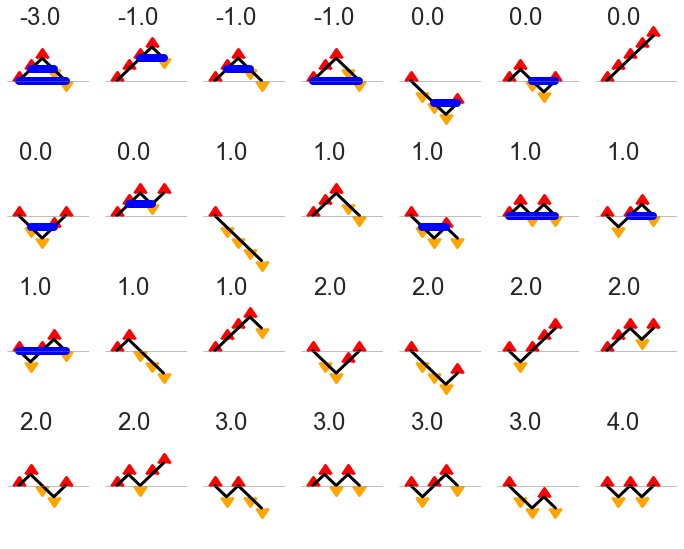

In [317]:
conf = Conformation(sequence='UAUUA')
#this sequence checks out with the matlab unit test

conf.run()

figure(figsize=(12,12))

# explicitly view all traces, good for troubleshooting

draw_conformations(conf,structs_per_row=7)

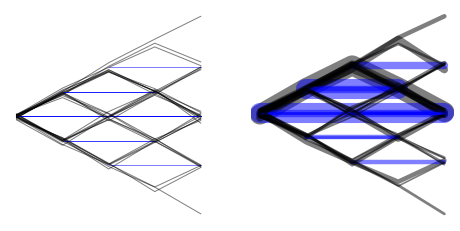

In [329]:
#playing with overlaying traces, not committed here

figure(figsize=(8,4))
subplot(1,2,1)
draw_traces(conf, boltz_weight=False)
subplot(1,2,2)
draw_traces(conf, boltz_weight=True)

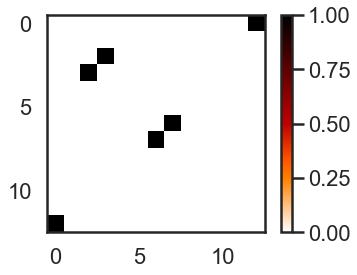

In [314]:
#3WJ and how to get bp matrix

conf = Conformation(secstruct = '(.( )..( )....)')
conf.run()

imshow(conf.bpps, cmap='gist_heat_r')
colorbar()

## [for kicks] draw a connectivity matrix with force-directed graph in networkx

In [310]:
conf = Conformation(secstruct = '..((.((..((...)))..)..(((...)))....))')
conf.run()

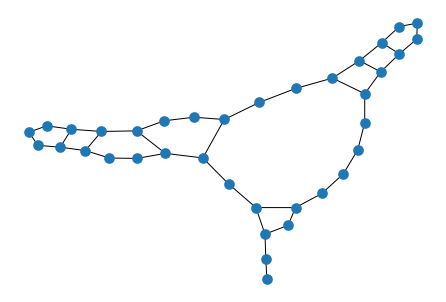

In [312]:
import networkx as nx

adj_matrix = copy(conf.connectivity_matrices[0])

# boost spring constant on backbone
for m in range(conf.N-1):
    if conf.is_chainbreak[m] != 1:
        adj_matrix[m,m+1] += 1
        adj_matrix[m+1,m] += 1

g = nx.Graph(adj_matrix)
pos = nx.drawing.layout.spring_layout(g, k=0.1, iterations=1000)

nx.draw(g, pos=pos, edge_color='k', node_shape='.')

## Demonstrate Design class

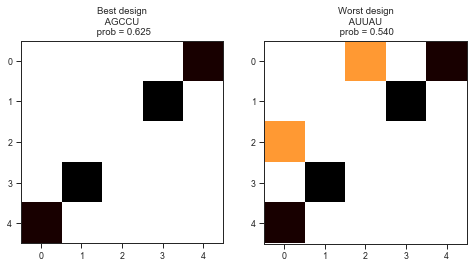

In [5]:
# following matlab unit test

design_mdl = Design(secstruct='((.))')

figure(figsize=(8,4))
design_mdl.run()

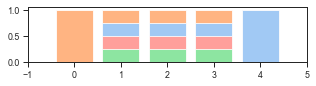

In [10]:
plot_seqlogo(design_mdl.sequences)

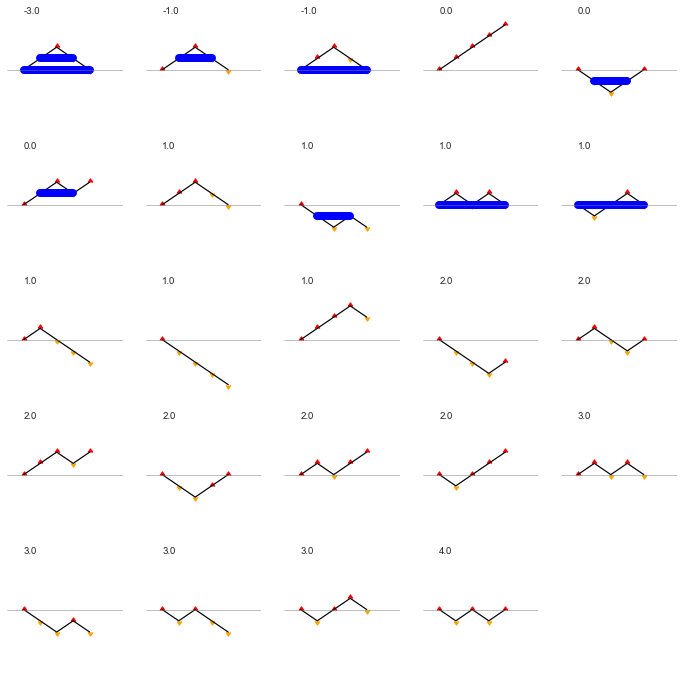

In [344]:
# design_mdl attribute conformations is list of Conformation classes

figure(figsize=(12,12))
draw_conformations(design_mdl.conformations[0])

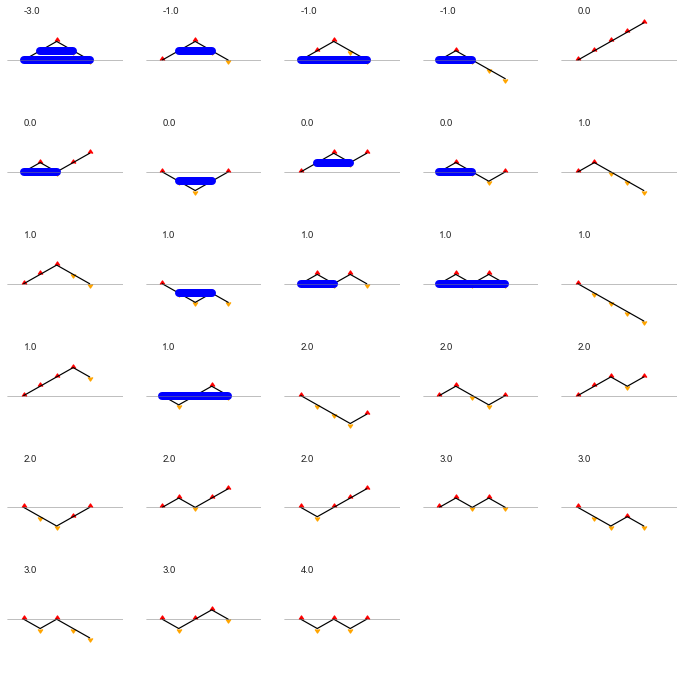

In [345]:
figure(figsize=(12,12))
draw_conformations(design_mdl.conformations[-1])